# Study Calpainopathie model

## Importing libraries

In [109]:
import cobra
from cobra.flux_analysis import pfba
from escher import Builder
import d3flux
import SBMLDiagrams

In [110]:
import matplotlib
import matplotlib.pyplot as plt

In [111]:
from importlib import reload

In [112]:
import metabolic_analysis_library as mal
reload(mal)

<module 'metabolic_analysis_library' from '/home/csiharath/Documents/mitocore_calpainopathy/metabolic_analysis_library.py'>

## Loading sbml model

In [113]:
mitocore_mouse25_calpain=cobra.io.read_sbml_model("Models/Mitocore_mouse_calpain.xml")
mitocore_mouse65_calpain=cobra.io.read_sbml_model("Models/Mitocore_mouse_calpain.xml")
mitocore_mouse85_calpain=cobra.io.read_sbml_model("Models/Mitocore_mouse_calpain.xml")
mitocore_mouse100_calpain=cobra.io.read_sbml_model("Models/Mitocore_mouse_calpain.xml")

### Choose solver to use 

In [114]:
models_to_use = [mitocore_mouse25_calpain, mitocore_mouse65_calpain, mitocore_mouse85_calpain, mitocore_mouse100_calpain]
compensation1 = [mitocore_mouse85_calpain, mitocore_mouse100_calpain]

for model in models_to_use:
    model.solver = 'glpk'

### Adjustement in model's parameters

Needed for the model to product at least as much lactate as in the healthy model

Values are taken from the study on the healthy model

In [115]:
mitocore_mouse25_calpain.reactions.LDH_L.upper_bound = -0.075
mitocore_mouse65_calpain.reactions.LDH_L.upper_bound = -0.104
mitocore_mouse85_calpain.reactions.LDH_L.upper_bound = -0.141167
mitocore_mouse100_calpain.reactions.LDH_L.upper_bound = -0.399833 * 2.83

R_r1434_upper_bound : amino acid carrier L-alanine
R_HCO3t_MitoCore_upper_bound : bicarbonate diffusion
R_BHBt_upper_bound : (R)-3-Hydroxybutanoate transport via H+ symport
R_ACACt2_upper_bound : acetoacetate transport via proton symport
R_BUTt2r_upper_bound : Butyrate transport via proton symport, reversible
R_GLYCt_lower_bound : glycerol transport via channel
R_HIStiDF_upper_bound : L-histidine transport via diffusion (extracellular to cytosol)
R_ILEtec_upper_bound : L-isoleucine transport via diffusion (extracellular to cytosol)
R_LEUtec_upper_bound : L-leucine transport via diffusion (extracellular to cytosol)
R_LYStiDF_upper_bound : L-lysine transport via diffusion (extracellular to cytosol)
R_METtec_upper_bound : L-methionine transport via diffusion (extracellular to cytosol)
R_PHEtec_upper_bound : L-phenylalanine transport via diffusion (extracellular to cytosol)
R_r2534_upper_bound : L-threonine transport
R_TRPt_upper_bound : L-tryptophan transport
R_VALtec_upper_bound : L-valine transport via diffusion (extracellular to cytosol)
R_ARGtiDF_upper_bound : L-arginine transport via diffusion (extracellular to cytosol)
R_ASPte_lower_bound : L-aspartate transport (reaction c vers e)
R_CYStec_upper_bound : L-cysteine transport via diffusion (extracellular to cytosol)
R_GLYt2r_upper_bound : glycine reversible transport via proton symport
R_PROt2r_upper_bound : L-proline reversible transport via proton symport
R_r2526_upper_bound : L-serine transport
R_TYRt_upper_bound : L-tyrosine transport
R_r2532_upper_bound : L-asparagine transport
R_ALAt2r_upper_bound : L-alanine reversible transport via proton symport
R_ACt2r_lower_bound : acetate reversible transport via proton symport
R_ACt2r_upper_bound : acetate reversible transport via proton symport

In [116]:
condition_3 = ["HCO3t_MitoCore",
"BHBt",
"ACACt2",
"BUTt2r", 
"GLYCt"]

In [117]:
condition_4 = ["r1434",
"GLCt1r",
"HDCAtr",
"L_LACt2r",
"HIStiDF",
"ILEtec",
"LEUtec",
"LYStiDF",
"METtec",
"PHEtec",
"r2534",
"TRPt",
"VALtec",
"ARGtiDF",
"ASPte", # reversed
"CYStec",
"GLYt2r",
"PROt2r",
"r2526",
"TYRt",
"r2532",
"ALAt2r",
"ACt2r"]


In [118]:
lb = ["GLYCt", "ASPte"]

In [119]:
def change_ub(models, list_reactions, except_lb = [], value = 1000):
    for model in models:
        for reaction in list_reactions:
            if reaction not in except_lb:
                model.reactions.get_by_id(reaction).upper_bound = value
            else:
                model.reactions.get_by_id(reaction).lower_bound = -value

In [120]:
# for reaction in compensations_allowed:
#         if reaction not in lb: 
#             for model in models_to_use:
#                 model.reactions.get_by_id(reaction).upper_bound = 1000
#         else:
#             for model in models_to_use:
#                 model.reactions.get_by_id(reaction).lower_bound = -1000

In [121]:
# for reaction in bound_to_check:
#     if reaction not in compensations_allowed:
#         if reaction not in lb: 
#             for model in models_to_use:
#                 model.reactions.get_by_id(reaction).upper_bound = 1
#         else:
#             for model in models_to_use:
#                 model.reactions.get_by_id(reaction).lower_bound = -1


In [122]:
# for r in bound_to_check:
#     if r not in compensations_allowed:
#         if r not in lb:
#             mitocore_mouse100_calpain.reactions.get_by_id(r).upper_bound = 1
#         else:
#             mitocore_mouse100_calpain.reactions.get_by_id(r).lower_bound = -1

In [123]:
inc_1 = False
inc_2 = False
inc_3 = False

### Runs model for each condition of physical exercise

Define upper bounds of glucose, dioxygen and fatty acid absorption and atp protucion for each condition

In [124]:
O2_ub_25 = 3.7
GLC_ub_25 = 0.03
FA_ub_25 = 0.1
ATP_ub_25 = 14.6

O2_ub_65 = 7.9
GLC_ub_65 = 0.13
FA_ub_65 = 0.27
ATP_ub_65 = 36.52

O2_ub_85 = 11.1
GLC_ub_85 = 0.6#0.6 5
FA_ub_85 = 0.3
ATP_ub_85 = 54.8

O2_ub_100 = 14
GLC_ub_100 = 2#2 5
FA_ub_100 = 0.08
ATP_ub_100 = 75

bdh_ub = 0.048 # 0.048 1000
acac_ub = 0.114 # 0.114 1000

In [125]:
# mitocore_mouse85_calpain.reactions.get_by_id("CSm").lower_bound = 3.34

In [126]:
output25_calpain=mal.define_boundary_and_run_model(model=mitocore_mouse25_calpain,O2_upper_bound=O2_ub_25,glucose_upper_bound=GLC_ub_25,
    FA_upper_bound=FA_ub_25,hydroxybutyrate_upper_bound=bdh_ub,Acetoacetate_upper_bound=acac_ub, atp_value=ATP_ub_25, FVA=True, pFBA=True)

In [127]:
if output25_calpain[3].fluxes['OF_ATP_MitoCore'] != ATP_ub_25:
    inc_1 = True
    print("25% ATP not reached, increasing Glucose uptake")
    GLC_ub_25 = 5
    GLC_ub_65 = 5
    GLC_ub_85 = 5
    GLC_ub_100 = 5

    output25_calpain=mal.define_boundary_and_run_model(model=mitocore_mouse25_calpain,O2_upper_bound=O2_ub_25,glucose_upper_bound=GLC_ub_25, 
        FA_upper_bound=FA_ub_25,hydroxybutyrate_upper_bound=bdh_ub,Acetoacetate_upper_bound=acac_ub, atp_value=ATP_ub_25, FVA=True, pFBA=True)

if output25_calpain[3].fluxes['OF_ATP_MitoCore'] != ATP_ub_25:
    inc_2 = True
    print("25% ATP not reached, increasing ketone bodies and glycerol uptake")
    change_ub([mitocore_mouse25_calpain, mitocore_mouse65_calpain, mitocore_mouse85_calpain, mitocore_mouse100_calpain], condition_3, lb)

    output25_calpain=mal.define_boundary_and_run_model(model=mitocore_mouse25_calpain,O2_upper_bound=O2_ub_25,glucose_upper_bound=GLC_ub_25, 
        FA_upper_bound=FA_ub_25,hydroxybutyrate_upper_bound=bdh_ub,Acetoacetate_upper_bound=acac_ub, atp_value=ATP_ub_25, FVA=True, pFBA=True)

if output25_calpain[3].fluxes['OF_ATP_MitoCore'] != ATP_ub_25:
    inc_3 = True
    print("25% ATP not reached, increasing AA uptake")
    change_ub([mitocore_mouse25_calpain, mitocore_mouse65_calpain, mitocore_mouse85_calpain, mitocore_mouse100_calpain], condition_4, lb, 1)

    output25_calpain=mal.define_boundary_and_run_model(model=mitocore_mouse25_calpain,O2_upper_bound=O2_ub_25,glucose_upper_bound=GLC_ub_25, 
        FA_upper_bound=FA_ub_25,hydroxybutyrate_upper_bound=bdh_ub,Acetoacetate_upper_bound=acac_ub, atp_value=ATP_ub_25, FVA=True, pFBA=True)

solution25_calpain = output25_calpain[3]
fva25_calpain = output25_calpain[4]

In [128]:
output65_calpain=mal.define_boundary_and_run_model(model=mitocore_mouse65_calpain,O2_upper_bound=O2_ub_65,glucose_upper_bound=GLC_ub_65,
    FA_upper_bound=FA_ub_65,hydroxybutyrate_upper_bound=bdh_ub,Acetoacetate_upper_bound=acac_ub, atp_value=ATP_ub_65, FVA=True, pFBA=True)


In [129]:
if output65_calpain[3].fluxes['OF_ATP_MitoCore'] != ATP_ub_65 and not inc_1:
    inc_1 = True
    print("65% ATP not reached, increasing Glucose uptake")
    GLC_ub_65 = 5
    GLC_ub_85 = 5
    GLC_ub_100 = 5

    output65_calpain=mal.define_boundary_and_run_model(model=mitocore_mouse65_calpain,O2_upper_bound=O2_ub_65,glucose_upper_bound=GLC_ub_65, 
        FA_upper_bound=FA_ub_65,hydroxybutyrate_upper_bound=bdh_ub,Acetoacetate_upper_bound=acac_ub, atp_value=ATP_ub_65, FVA=True, pFBA=True)

if output65_calpain[3].fluxes['OF_ATP_MitoCore'] != ATP_ub_65 and not inc_2:
    inc_2 = True
    print("65% ATP not reached, increasing ketone bodies and glycerol uptake")
    change_ub([mitocore_mouse65_calpain, mitocore_mouse85_calpain, mitocore_mouse100_calpain], condition_3, lb)

    output65_calpain=mal.define_boundary_and_run_model(model=mitocore_mouse65_calpain,O2_upper_bound=O2_ub_65,glucose_upper_bound=GLC_ub_65, 
        FA_upper_bound=FA_ub_65,hydroxybutyrate_upper_bound=bdh_ub,Acetoacetate_upper_bound=acac_ub, atp_value=ATP_ub_65, FVA=True, pFBA=True)

if output65_calpain[3].fluxes['OF_ATP_MitoCore'] != ATP_ub_65 and not inc_3:
    inc_3 = True
    print("65% ATP not reached, increasing AA uptake")
    change_ub([mitocore_mouse65_calpain, mitocore_mouse85_calpain, mitocore_mouse100_calpain], condition_4, lb, 1)

    output65_calpain=mal.define_boundary_and_run_model(model=mitocore_mouse65_calpain,O2_upper_bound=O2_ub_65,glucose_upper_bound=GLC_ub_65, 
        FA_upper_bound=FA_ub_65,hydroxybutyrate_upper_bound=bdh_ub,Acetoacetate_upper_bound=acac_ub, atp_value=ATP_ub_65, FVA=True, pFBA=True)

solution65_calpain = output65_calpain[3]
fva65_calpain = output65_calpain[4]

65% ATP not reached, increasing Glucose uptake


In [130]:
output85_calpain=mal.define_boundary_and_run_model(model=mitocore_mouse85_calpain,O2_upper_bound=O2_ub_85,glucose_upper_bound=GLC_ub_85,
    FA_upper_bound=FA_ub_85,hydroxybutyrate_upper_bound=bdh_ub,Acetoacetate_upper_bound=acac_ub, atp_value=ATP_ub_85, FVA=True, pFBA=True)

# solution85_calpain = output85_calpain[3]
# fva85_calpain = output85_calpain[4]

In [131]:
if output85_calpain[3].fluxes['OF_ATP_MitoCore'] != ATP_ub_85 and not inc_1:
    inc_1 = True
    print("85% ATP not reached, increasing Glucose uptake")
    GLC_ub_85 = 5
    GLC_ub_100 = 5

    output85_calpain=mal.define_boundary_and_run_model(model=mitocore_mouse85_calpain,O2_upper_bound=O2_ub_85,glucose_upper_bound=GLC_ub_85, 
        FA_upper_bound=FA_ub_85,hydroxybutyrate_upper_bound=bdh_ub,Acetoacetate_upper_bound=acac_ub, atp_value=ATP_ub_85, FVA=True, pFBA=True)

if output85_calpain[3].fluxes['OF_ATP_MitoCore'] != ATP_ub_85 and not inc_2:
    inc_2 = True
    print("85% ATP not reached, increasing ketone bodies and glycerol uptake")
    change_ub([mitocore_mouse85_calpain, mitocore_mouse100_calpain], condition_3, lb)

    output85_calpain=mal.define_boundary_and_run_model(model=mitocore_mouse85_calpain,O2_upper_bound=O2_ub_85,glucose_upper_bound=GLC_ub_85, 
        FA_upper_bound=FA_ub_85,hydroxybutyrate_upper_bound=bdh_ub,Acetoacetate_upper_bound=acac_ub, atp_value=ATP_ub_85, FVA=True, pFBA=True)

if output85_calpain[3].fluxes['OF_ATP_MitoCore'] != ATP_ub_85 and not inc_3:
    inc_3 = True
    print("85% ATP not reached, increasing AA uptake")
    change_ub([mitocore_mouse85_calpain, mitocore_mouse100_calpain], condition_4, lb, 1)

    output85_calpain=mal.define_boundary_and_run_model(model=mitocore_mouse85_calpain,O2_upper_bound=O2_ub_85,glucose_upper_bound=GLC_ub_85, 
        FA_upper_bound=FA_ub_85,hydroxybutyrate_upper_bound=bdh_ub,Acetoacetate_upper_bound=acac_ub, atp_value=ATP_ub_85, FVA=True, pFBA=True)

solution85_calpain = output85_calpain[3]
fva85_calpain = output85_calpain[4]

85% ATP not reached, increasing ketone bodies and glycerol uptake


In [132]:
output100_calpain=mal.define_boundary_and_run_model(model=mitocore_mouse100_calpain,O2_upper_bound=O2_ub_100,glucose_upper_bound=GLC_ub_100,
    FA_upper_bound=FA_ub_100,hydroxybutyrate_upper_bound=bdh_ub,Acetoacetate_upper_bound=acac_ub, atp_value=ATP_ub_100, FVA=True, pFBA=True)

# solution100_calpain = output100_calpain[3]
# fva100_calpain = output100_calpain[4]

In [133]:
if output100_calpain[3].fluxes['OF_ATP_MitoCore'] != ATP_ub_100 and not inc_1:
    inc_1 = True
    print("100% ATP not reached, increasing Glucose uptake")
    GLC_ub_100 = 5

    output100_calpain=mal.define_boundary_and_run_model(model=mitocore_mouse100_calpain,O2_upper_bound=O2_ub_100,glucose_upper_bound=GLC_ub_100, 
        FA_upper_bound=FA_ub_100,hydroxybutyrate_upper_bound=bdh_ub,Acetoacetate_upper_bound=acac_ub, atp_value=ATP_ub_100, FVA=True, pFBA=True)

if output100_calpain[3].fluxes['OF_ATP_MitoCore'] != ATP_ub_100 and not inc_2:
    inc_2 = True
    print("100% ATP not reached, increasing ketone bodies and glycerol uptake")
    change_ub([mitocore_mouse100_calpain], condition_3, lb)

    output100_calpain=mal.define_boundary_and_run_model(model=mitocore_mouse100_calpain,O2_upper_bound=O2_ub_100,glucose_upper_bound=GLC_ub_100, 
        FA_upper_bound=FA_ub_100,hydroxybutyrate_upper_bound=bdh_ub,Acetoacetate_upper_bound=acac_ub, atp_value=ATP_ub_100, FVA=True, pFBA=True)

if output100_calpain[3].fluxes['OF_ATP_MitoCore'] != ATP_ub_100 and not inc_3:
    inc_3 = True
    print("100% ATP not reached, increasing AA uptake")
    change_ub([mitocore_mouse100_calpain], condition_4, lb, 1)

    output100_calpain=mal.define_boundary_and_run_model(model=mitocore_mouse100_calpain,O2_upper_bound=O2_ub_100,glucose_upper_bound=GLC_ub_100, 
        FA_upper_bound=FA_ub_100,hydroxybutyrate_upper_bound=bdh_ub,Acetoacetate_upper_bound=acac_ub, atp_value=ATP_ub_100, FVA=True, pFBA=True)

solution100_calpain = output100_calpain[3]
fva100_calpain = output100_calpain[4]

100% ATP not reached, increasing AA uptake


In [134]:
key_reactions_calpain = mal.create_df_key_fluxes({'calpain_25': solution25_calpain, 'calpain_65': solution65_calpain, 'calpain_85': solution85_calpain, 'calpain_100': solution100_calpain}, list_enzyme=["FBA", "PDHm", "LDH_L", "CSm", "CI_MitoCore", "r0722", "r0732", "OF_ATP_MitoCore", "O2t"])
key_reactions_calpain

,calpain_25,calpain_65,calpain_85,calpain_100
FBA,0.030000,0.540485,2.660000e+00,2.660000
PDHm,0.003500,0.853902,1.095390e+00,0.000000
LDH_L,-0.075000,-0.227068,-1.221881e+01,-34.060998
CSm,1.048101,2.424383,1.297390e+00,0.000000
CI_MitoCore,4.098703,9.629093,1.424640e+01,17.926409
r0722,0.100000,0.188810,4.163336e-17,-0.071990
r0732,0.100000,0.188810,-1.387779e-17,-0.071990
OF_ATP_MitoCore,14.600000,36.520000,5.480000e+01,75.000000
O2t,2.948951,7.141839,7.760519e+00,10.795937


## Data visualisation

### Dataframe of FBA and FVA

In [63]:
print(fva25_calpain.to_markdown())

|                          |         minimum |        maximum |
|:-------------------------|----------------:|---------------:|
| EX_2hb_e                 |     0           |    0.017       |
| EX_ac_e                  |    -0.01        |    0.01        |
| EX_acac_e                |    -0.114       |    0           |
| EX_akg_e                 |     0           |    0.287747    |
| EX_ala_B_e               |     0           |    0           |
| EX_ala_L_e               |    -0.01        |    0.308       |
| EX_arg_L_e               |    -0.007       |    0.104667    |
| EX_argsuc_e              |     0           |    0.111667    |
| EX_asn_L_e               |    -0.01        |    0.296797    |
| EX_asp_L_e               |    -0.154       |    0.164       |
| EX_bhb_e                 |    -0.048       |    0           |
| EX_bilirub_e             |     0           |    0.0256882   |
| EX_biomass_e             |    14.6         |   15.0392      |
| EX_but_e                 |    -0.006  

In [65]:
all_fluxes_25_calpain = mal.build_dataframe_visual(mitocore_mouse25_calpain, solution25_calpain)
print(all_fluxes_25_calpain.to_markdown())

|                          |        fluxes |   reduced_costs | Subsystems                                                       | Reactions                |
|:-------------------------|--------------:|----------------:|:-----------------------------------------------------------------|:-------------------------|
| ACOAHi                   |   0           |    16.9162      | Acetate production                                               | ACOAHi                   |
| ALCD2yf                  |   0           |     3.94081     | Alcohol metabolism                                               | ALCD2yf                  |
| ALCD2if                  |   0           |    -2           | Alcohol metabolism                                               | ALCD2if                  |
| ACALDtm                  |   0           |    -2           | Alcohol metabolism                                               | ACALDtm                  |
| ALDD2xm                  |   0           |    -2        

In [66]:
all_fluxes_65_calpain = mal.build_dataframe_visual(mitocore_mouse65_calpain, solution65_calpain)


In [67]:
all_fluxes_85_calpain = mal.build_dataframe_visual(mitocore_mouse85_calpain, solution85_calpain)
print(all_fluxes_85_calpain.to_markdown())

|                          |        fluxes |   reduced_costs | Subsystems                                                       | Reactions                |
|:-------------------------|--------------:|----------------:|:-----------------------------------------------------------------|:-------------------------|
| ACOAHi                   |   0           |          2      | Acetate production                                               | ACOAHi                   |
| ALCD2if                  |  -0.118       |          2      | Alcohol metabolism                                               | ALCD2if                  |
| ACALDtm                  |   0           |         -2      | Alcohol metabolism                                               | ACALDtm                  |
| ALDD2xm                  |   0           |        121.718  | Alcohol metabolism                                               | ALDD2xm                  |
| ALDD2x                   |   0           |         -2   

In [68]:
all_fluxes_100_calpain = mal.build_dataframe_visual(mitocore_mouse100_calpain, solution100_calpain)
print(all_fluxes_100_calpain.to_markdown())

|                          |        fluxes |   reduced_costs | Subsystems                                                       | Reactions                |
|:-------------------------|--------------:|----------------:|:-----------------------------------------------------------------|:-------------------------|
| ACOAHi                   |   0           |       253.845   | Acetate production                                               | ACOAHi                   |
| ALCD2if                  |  -0.01        |         2       | Alcohol metabolism                                               | ALCD2if                  |
| ACALDtm                  |   0           |        -2       | Alcohol metabolism                                               | ACALDtm                  |
| ALDD2xm                  |   0           |       462.324   | Alcohol metabolism                                               | ALDD2xm                  |
| ALDD2x                   |   0           |        -2    

### FVA plot

/tmp/ipykernel_312854/3525043142.py:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


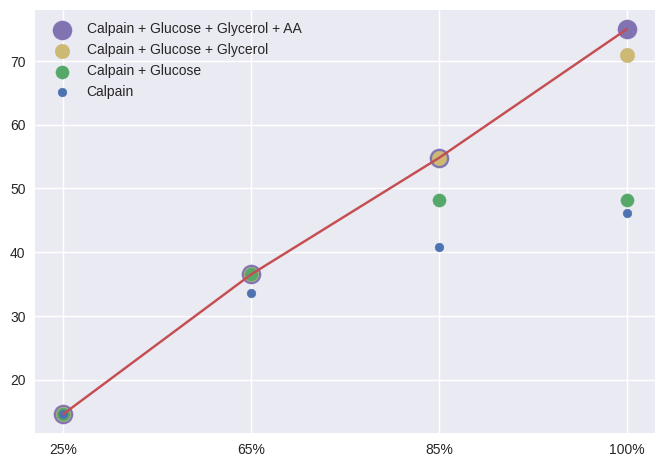

In [74]:
objectives = {"25%": 14.6, "65%": 36.52, "85%": 54.8, "100%": 75}
calpain = {"25%": 14.6, "65%": 33.60, "85%": 40.88, "100%": 46.14}
calpain_glc = {"25%": 14.6, "65%": 36.52, "85%": 48.127, "100%": 48.127}
calpain_glyc = {"25%": 14.6, "65%": 36.52, "85%": 54.8, "100%": 70.94}

plt.style.use('seaborn')

plt.plot(objectives.keys(), objectives.values(), color="#C44E52")

plt.scatter(objectives.keys(), objectives.values(), color="#8172B2", alpha=1, s=190, label="Calpain + Glucose + Glycerol + AA")
plt.scatter(calpain_glyc.keys(), calpain_glyc.values(), color="#CCB974", alpha=1, s=110, label="Calpain + Glucose + Glycerol")
plt.scatter(calpain_glc.keys(), calpain_glc.values(), color="#55A868", alpha=1, s=90, label="Calpain + Glucose")
plt.scatter(calpain.keys(), calpain.values(), color="#4C72B0", alpha=1, s=40, label="Calpain")

plt.legend()


In [75]:
def fva_plot (dataframe_calpain, dict_enzyme): 
    cmap = matplotlib.cm.get_cmap('tab10')
    count = 0
    
    list_enzyme = list(dict_enzyme.keys())
    legend = dict_enzyme
    fig, (ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8) = plt.subplots(8, 1, figsize=(5, 15))
    axes = [ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8]

    for enzyme in list_enzyme:
        df_enz = dataframe_calpain.loc[dataframe_calpain['enzymes'] == enzyme]
        # df_enz_wt = dataframe_wt.loc[dataframe_wt['enzymes'] == enzyme]

        # y = 0.85-(0.1*count)
        # print(y)
        # fig.text(0.1, y, enzyme, fontsize=12)

        # fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 1.5), sharey=True)
        # axes[count][0].scatter(df_enz_wt['intensity'], df_enz_wt['fluxes'], color=cmap(7))
        # axes[count][0].plot(df_enz_wt['intensity'], df_enz_wt['fluxes'], color=cmap(7))
        # axes[count][0].fill_between(df_enz_wt['intensity'], df_enz_wt['fva_min'], df_enz_wt['fva_max'], alpha=0.2, color=cmap(7), linewidth=0)

        # axes[count].set_ylabel(legend[enzyme], fontsize=10)
        axes[count].tick_params(labelsize=13)


        axes[count].scatter(df_enz['intensity'], df_enz['fluxes'], color="#024c4e")
        axes[count].plot(df_enz['intensity'], df_enz['fluxes'], color="#024c4e")
        axes[count].fill_between(df_enz['intensity'], df_enz['fva_min'], df_enz['fva_max'], alpha=0.2, color="#024c4e", linewidth=0)

        # leg.append(mlines.Line2D([], [], color=cmap(count), marker=markers[count], markersize=10, label=enzyme, ls='-'))
        # fig.legend(handles=[leg])
        count += 1

    # fig.legend(handles=leg, loc="center right")
    # fig.tight_layout()

    # fig.text(0.5, 0.06, "Exercise intensity (VO2max percentage)", ha='center', fontsize=12)
    # fig.text(0.03, 0.5, 'Flux (mmol.gDW-1.h-1)', va='center', rotation='vertical', fontsize=12)
    fig.text(0.22, 0.89, "CAPN3-KO + Uptake modulation", fontsize=15)
    boundaries = [0, 3, 5, 8]  # The first color spans 2 units, the others 1 unit each
    colors = ['#937860', '#60ab71', '#587ab2']
    cmap = cmap= matplotlib.colors.ListedColormap(colors)
    norm = matplotlib.colors.BoundaryNorm(boundaries, cmap.N, clip=True)
    cbar_ax = fig.add_axes([0.92, 0.09, 0.007, 0.8])
    plt.colorbar(matplotlib.cm.ScalarMappable(norm=norm, cmap=cmap), cax=cbar_ax, boundaries=boundaries, ticks=[1.8, 4, 6.5], spacing='proportional')
    cbar_ax.set_yticklabels(['TCA cycle\nMitochondrion', '\u03B2-oxidation', 'Glycolysis'], fontsize=13)
    fig.savefig("Plots/FVA_calpain+.png")

In [136]:
enzyme_name = {"FBA": "Fructose biphosphat\naldolase", "PDHm": "Pyruvate\ndehydrogenase", "LDH_L": "Lactate\ndehydrogenase", "r0722": "3-hydroaxyacyl-CoA\ndehydrogenase", "r0732": "Acetyl-CoA\nacyltransferase 2", "CSm": "Citrate synthase", "CI_MitoCore": "Complex I", "O2t": "Oxygen"}
df_calpain_plot = mal.create_df_flux_plot({'calpain_25': [solution25_calpain, fva25_calpain], 'calpain_65': [solution65_calpain, fva65_calpain], 'calpain_85': [solution85_calpain, fva85_calpain], 'calpain_100': [solution100_calpain, fva100_calpain]}, list_enzyme = ["FBA", "PDHm", "LDH_L", "CSm", "CI_MitoCore", "r0722", "r0732", "O2t"])

In [78]:
df_calpain_plot['fluxes'] = df_calpain_plot['fluxes'].abs()
df_calpain_plot['fva_min'] = df_calpain_plot['fva_min'].abs()
df_calpain_plot['fva_max'] = df_calpain_plot['fva_max'].abs()

/tmp/ipykernel_312854/1924519472.py:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = matplotlib.cm.get_cmap('tab10')


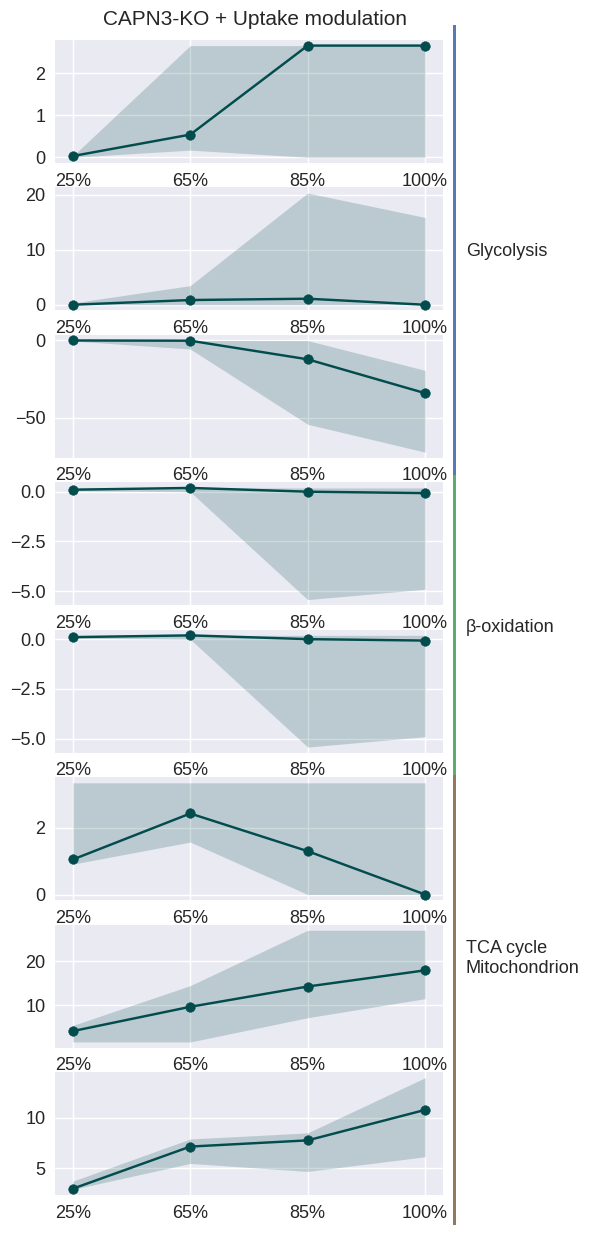

In [137]:
fva_plot(df_calpain_plot, enzyme_name)

### Barplot

Using the same pathways as before

['glycolysis', 'beta oxidation', 'Ketone bodies', 'Leucine degradation', 'Isoleucine degradation', 'Amino acid degradation']


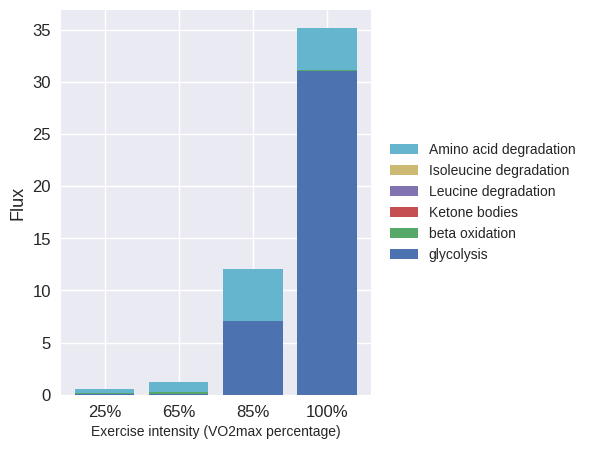

<module 'matplotlib.pyplot' from '/home/csiharath/.conda/envs/mitoenv/lib/python3.8/site-packages/matplotlib/pyplot.py'>

In [ ]:
dict_path = {'glycolysis': 'PGM', "beta oxidation":'r0732', "Ketone bodies":'BDHm', "Leucine degradation":'LEUTAm', 'Isoleucine degradation': "ILETAm", "Amino acid degradation":'GLUDxm'}
df_metabolic_pathways=mal.get_dict_pathways([solution25_calpain, solution65_calpain, solution85_calpain, solution100_calpain], dict_path)
mal.barplot_pathways(df_metabolic_pathways, "plot_mouse_calpain_voie_metabolique_bis.png", keys=['glycolysis', 'beta oxidation', 'Ketone bodies', 'Leucine degradation', 'Isoleucine degradation', 'Amino acid degradation'], add_legend=True)
# Utils_Cobrapy.plot_voie_metabolique_ou_accoa(dict_results_calpain_voie_metabolique,"plot_mouse_calpain_voie_metabolique_bis.png", keys=['glycolysis', 'beta oxidation', 'ketone bodies', 'leucine degradation', 'isoleucine degradation'])

In [ ]:
df_metabolic_pathways_prop = mal.build_df_proportion(df_metabolic_pathways)
# dict_results_voie_metabolique_proportion_calpain = mal.build_dict_proportion(dict_pathway=dict_results_calpain_voie_metabolique, dict_tot={'25%':0,'65%':0,'85%':0, '100%':0}, dict_prop={'25%':{},'65%':{},'85%':{}, '100%':{}})

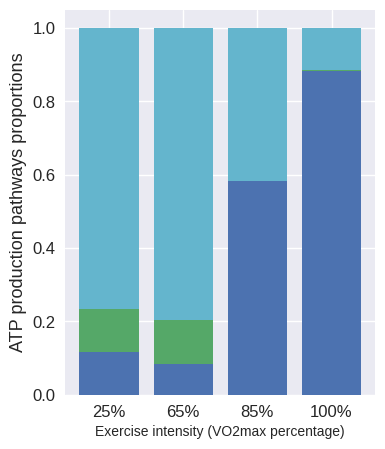

<module 'matplotlib.pyplot' from '/home/csiharath/.conda/envs/mitoenv/lib/python3.8/site-packages/matplotlib/pyplot.py'>

In [ ]:
mal.barplot_pathways(df_metabolic_pathways_prop, "plot_mouse_voie_metabolique_proportion_calpain_add.png", keys=['glycolysis', 'beta oxidation', 'Ketone bodies', 'Leucine degradation', 'Isoleucine degradation', 'Amino acid degradation'], prop=True)
# Utils_Cobrapy.plot_voie_metabolique_ou_accoa(dict_results_voie_metabolique_proportion_calpain,"plot_mouse_voie_metabolique_proportion_calpain_add.png", prop=True)

Using new pathways

['glycolysis', 'beta oxidation', 'Malate-Asp shuttle', 'Leucine degradation', 'Isoleucine degradation', 'Amino acid degradation']


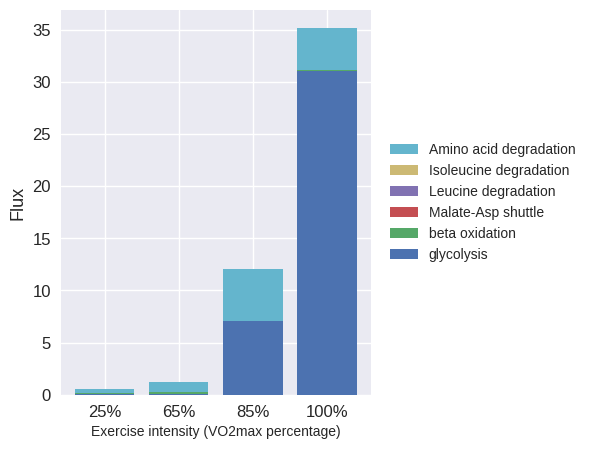

<module 'matplotlib.pyplot' from '/home/csiharath/.conda/envs/mitoenv/lib/python3.8/site-packages/matplotlib/pyplot.py'>

In [ ]:
dict_path = {'glycolysis': 'PGM', "beta oxidation":'r0732', "Malate-Asp shuttle":'BDHm', "Leucine degradation":'LEUTAm', 'Isoleucine degradation': "ILETAm", "Amino acid degradation":'GLUDxm'}
df_metabolic_pathways=mal.get_dict_pathways([solution25_calpain, solution65_calpain, solution85_calpain, solution100_calpain], dict_path)
mal.barplot_pathways(df_metabolic_pathways, "plot_mouse_calpain_voie_metabolique_bis.png", keys=['glycolysis', 'beta oxidation', 'Ketone bodies', 'Leucine degradation', 'Isoleucine degradation', 'Amino acid degradation'], add_legend=True)

# Utils_Cobrapy.plot_voie_metabolique_ou_accoa(dict_results_calpain_voie_metabolique,"plot_mouse_calpain_voie_metabolique_bis.png")

In [ ]:
dict_results_voie_metabolique_proportion_calpain = mal.build_dict_proportion(dict_pathway=dict_results_calpain_voie_metabolique, dict_tot={'25%':0,'65%':0,'85%':0, '100%':0}, dict_prop={'25%':{},'65%':{},'85%':{}, '100%':{}})

AttributeError: module 'metabolic_analysis_library' has no attribute 'build_dict_proportion'

In [ ]:
print(dict_results_voie_metabolique_proportion_calpain)

{'25%': {'glycolysis': 0.11730685478537337, 'beta oxidation': 0.11730685478537344, 'Malate-Aspartate shuttle': 0.0, 'Amino acid degradation': 0.7653862904292531}, '65%': {'glycolysis': 0.07266700511746994, 'beta oxidation': 0.0726670051174713, 'Malate-Aspartate shuttle': 5.738462494889842e-17, 'Amino acid degradation': 0.8546659897650587}, '85%': {'glycolysis': 0.4318613180611881, 'beta oxidation': 0.0, 'Malate-Aspartate shuttle': 0.27143253574202286, 'Amino acid degradation': 0.29670614619678914}, '100%': {'glycolysis': 0.21372379051927332, 'beta oxidation': 1.3307698445022433e-17, 'Malate-Aspartate shuttle': 0.23342078945219027, 'Amino acid degradation': 0.5528554200285365}}


[0. 0. 0. 0.]
glycolysis
[0.11730685 0.07266701 0.43186132 0.21372379]
beta oxidation
[0.23461371 0.14533401 0.43186132 0.21372379]
Malate-Aspartate shuttle
[0.23461371 0.14533401 0.70329385 0.44714458]
Amino acid degradation


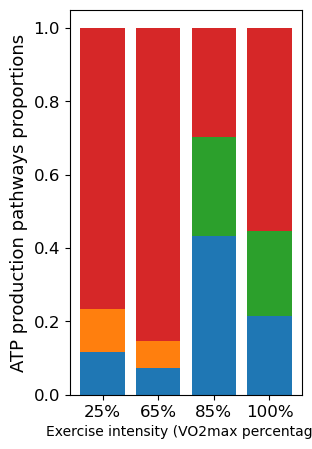

{'25%': {'glycolysis': 0.11730685478537337,
  'beta oxidation': 0.11730685478537344,
  'Malate-Aspartate shuttle': 0.0,
  'Amino acid degradation': 0.7653862904292531},
 '65%': {'glycolysis': 0.07266700511746994,
  'beta oxidation': 0.0726670051174713,
  'Malate-Aspartate shuttle': 5.738462494889842e-17,
  'Amino acid degradation': 0.8546659897650587},
 '85%': {'glycolysis': 0.4318613180611881,
  'beta oxidation': 0.0,
  'Malate-Aspartate shuttle': 0.27143253574202286,
  'Amino acid degradation': 0.29670614619678914},
 '100%': {'glycolysis': 0.21372379051927332,
  'beta oxidation': 1.3307698445022433e-17,
  'Malate-Aspartate shuttle': 0.23342078945219027,
  'Amino acid degradation': 0.5528554200285365}}

In [ ]:
mal.barplot_pathways(dict_results_voie_metabolique_proportion_calpain, "plot_mouse_voie_metabolique_proportion_calpain.png", prop=True)
# Utils_Cobrapy.plot_voie_metabolique_ou_accoa(dict_results_voie_metabolique_proportion_calpain,"plot_mouse_voie_metabolique_proportion_calpain_add.png", prop=True)

In [ ]:
mal.print_reactions_from_met(mitocore_mouse85_calpain, 'bhb_c', solution85_calpain, False)

BHBtmB_MitoCore: 0.82 PMF_m + bhb_c <=> 0.82 PMF_c + bhb_m
fluxes           0.0
reduced_costs   -2.0
Name: BHBtmB_MitoCore, dtype: float64
--------
BHBt: bhb_e + h_e --> bhb_c + h_c
fluxes             0.000000
reduced_costs    363.643942
Name: BHBt, dtype: float64
--------
